In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv("train.csv")

In [6]:
print (df.shape)

(9800, 18)


In [7]:
print (df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [9]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [11]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
df["Ship Date"]=pd.to_datetime(df["Ship Date"],dayfirst=True)

In [13]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [14]:
df=df.drop_duplicates()

In [15]:
sales_by_category = df.groupby ("Category")["Sales"].sum()
print(sales_by_category)

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64


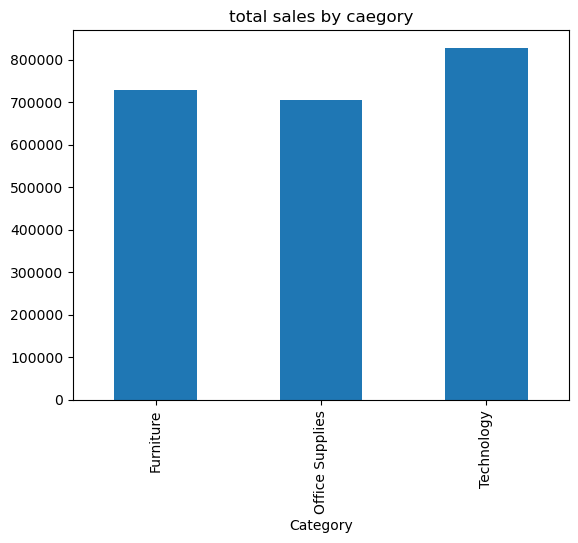

In [16]:
sales_by_category.plot(kind="bar",title="total sales by caegory")
plt.show()

In [17]:
sales_by_region = df.groupby("Region")["Sales"].sum()
print (sales_by_region)

Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


NameError: name 'plot' is not defined

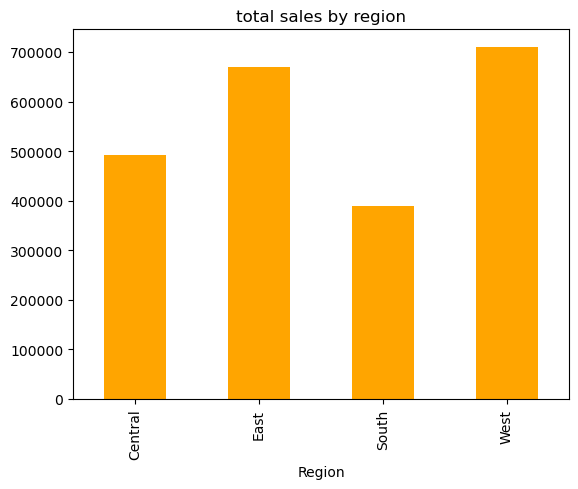

In [18]:
sales_by_region.plot(kind="bar",color="orange",title="total sales by region")
plot.show()

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


NameError: name 'plot' is not defined

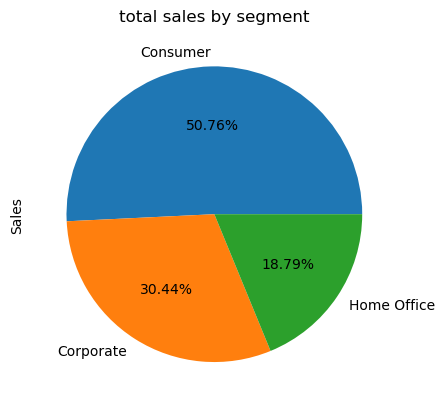

In [19]:
sales_by_segment = df.groupby("Segment")["Sales"].sum()
print(sales_by_segment)

sales_by_segment.plot(kind="pie", autopct="%.2f%%",title="total sales by segment")
plot.show()

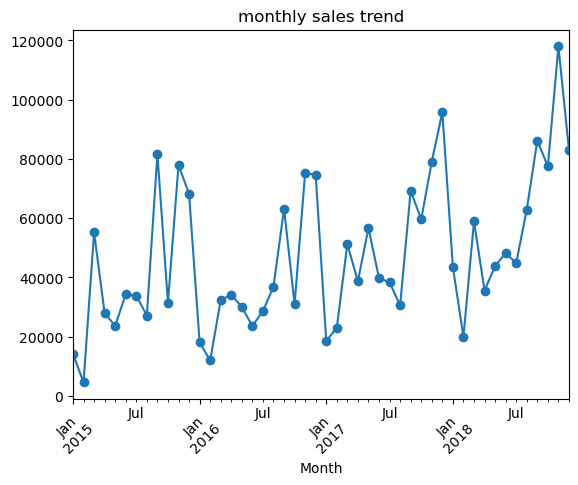

In [20]:
df["Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", marker="o", title="monthly sales trend")
plt.xticks(rotation=45)
plt.show()

Ship Mode
First Class       2.179214
Same Day          0.044610
Second Class      3.249211
Standard Class    5.008363
Name: Delivery Days, dtype: float64


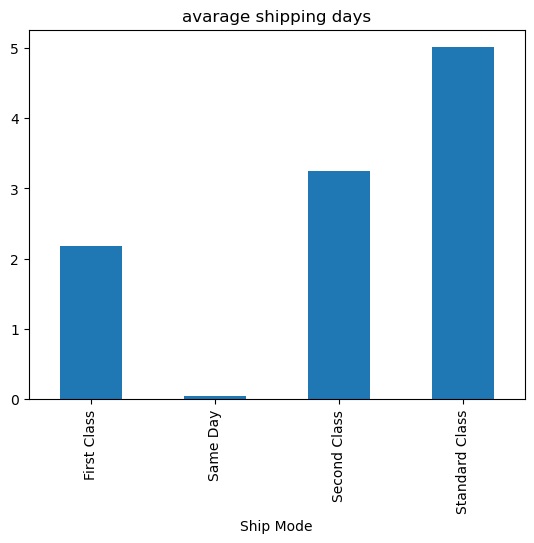

In [21]:
df["Delivery Days"] = (df["Ship Date"] - df["Order Date"]).dt.days
avg_delivery = df.groupby("Ship Mode")["Delivery Days"].mean()
print(avg_delivery)

avg_delivery.plot(kind="bar", title="avarage shipping days")
plt.show()